In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
from matplotlib import rc
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted',font_scale=1.5)
rcParams['figure.figsize'] = 16,10

In [12]:
raw = pd.read_csv('training_sample.csv')
raw.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [13]:
raw.isnull().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [14]:
raw.nunique()

UserID                     455401
basket_icon_click               2
basket_add_list                 2
basket_add_detail               2
sort_by                         2
image_picker                    2
account_page_click              2
promo_banner_click              2
detail_wishlist_add             2
list_size_dropdown              2
closed_minibasket_click         2
checked_delivery_detail         2
checked_returns_detail          2
sign_in                         2
saw_checkout                    2
saw_sizecharts                  2
saw_delivery                    2
saw_account_upgrade             2
saw_homepage                    2
device_mobile                   2
device_computer                 2
device_tablet                   2
returning_user                  2
loc_uk                          2
ordered                         2
dtype: int64

array([[<AxesSubplot:title={'center':'basket_icon_click'}>,
        <AxesSubplot:title={'center':'basket_add_list'}>,
        <AxesSubplot:title={'center':'basket_add_detail'}>,
        <AxesSubplot:title={'center':'sort_by'}>,
        <AxesSubplot:title={'center':'image_picker'}>],
       [<AxesSubplot:title={'center':'account_page_click'}>,
        <AxesSubplot:title={'center':'promo_banner_click'}>,
        <AxesSubplot:title={'center':'detail_wishlist_add'}>,
        <AxesSubplot:title={'center':'list_size_dropdown'}>,
        <AxesSubplot:title={'center':'closed_minibasket_click'}>],
       [<AxesSubplot:title={'center':'checked_delivery_detail'}>,
        <AxesSubplot:title={'center':'checked_returns_detail'}>,
        <AxesSubplot:title={'center':'sign_in'}>,
        <AxesSubplot:title={'center':'saw_checkout'}>,
        <AxesSubplot:title={'center':'saw_sizecharts'}>],
       [<AxesSubplot:title={'center':'saw_delivery'}>,
        <AxesSubplot:title={'center':'saw_account_upgra

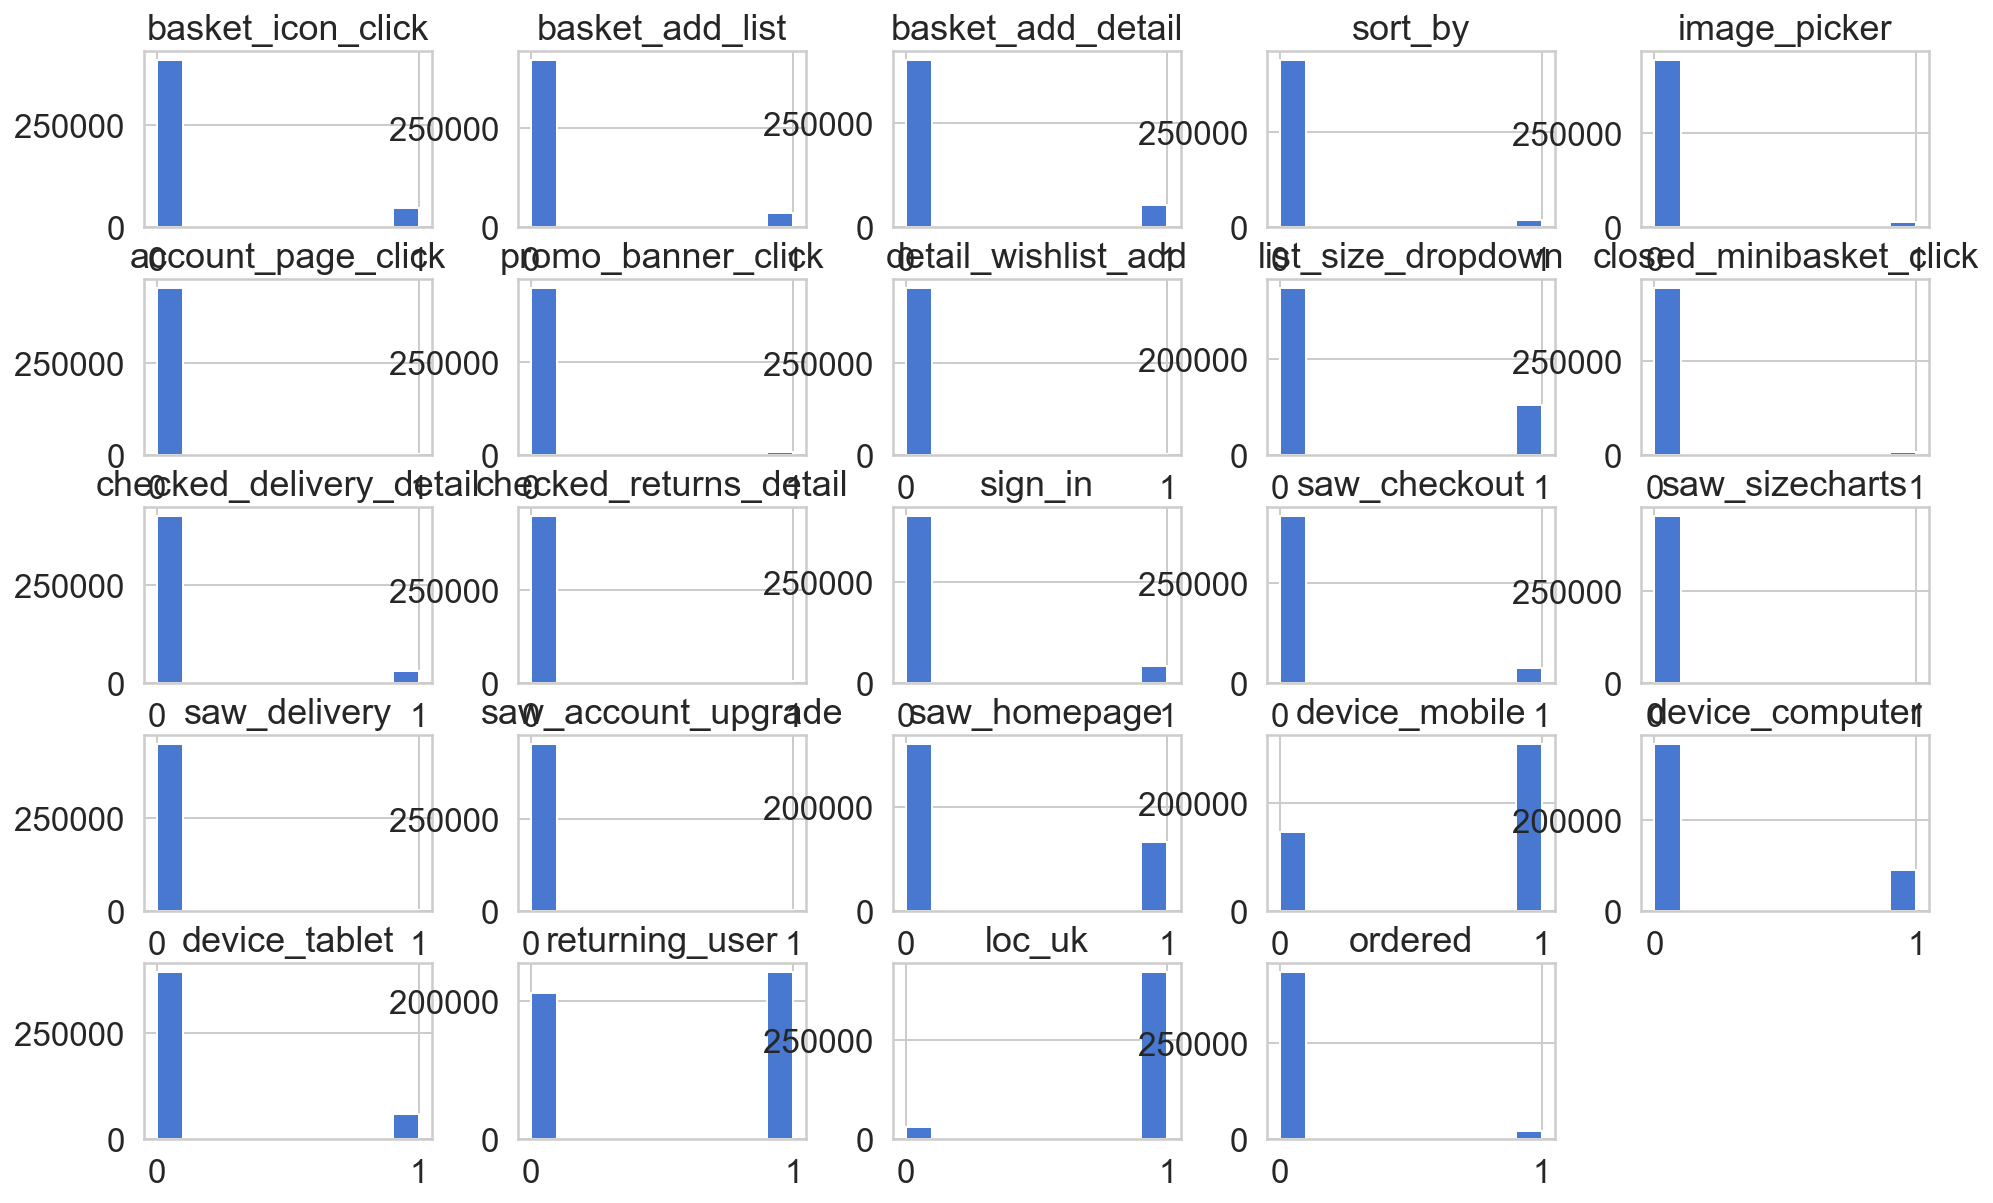

In [15]:
raw.hist()

So the dataset is actually a complete transactional dataset with only logical values to predict propensity. This seems to be IDEAL for a neural network. Oh boy.

In [16]:
raw1 = raw.copy()

In [17]:
raw.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

In [18]:
raw.set_index('UserID', inplace=True)

In [19]:
raw.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
UserID,,,,,,,,,,,,,,,,,,,,,
a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1


In [20]:
raw.to_csv('Data_preprocessed.csv')

In [9]:
X, y = raw.iloc[:,:-1], raw.iloc[:,-1:]

In [10]:
print(len(X), len(y))

455401 455401


In [11]:
X, y = np.asarray(X).astype(np.float64), np.asarray(y).astype(np.float64)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 30000)


In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 30000)

In [14]:
for s in [X_train, y_train, X_valid, y_valid, X_test, y_test]:
    print(len(s))

395401
395401
30000
30000
30000
30000


In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
raw.dtypes

basket_icon_click          int64
basket_add_list            int64
basket_add_detail          int64
sort_by                    int64
image_picker               int64
account_page_click         int64
promo_banner_click         int64
detail_wishlist_add        int64
list_size_dropdown         int64
closed_minibasket_click    int64
checked_delivery_detail    int64
checked_returns_detail     int64
sign_in                    int64
saw_checkout               int64
saw_sizecharts             int64
saw_delivery               int64
saw_account_upgrade        int64
saw_homepage               int64
device_mobile              int64
device_computer            int64
device_tablet              int64
returning_user             int64
loc_uk                     int64
ordered                    int64
dtype: object

In [29]:
def train_model(X, y, Xv, yv, lr=0.001, epochs = 30, batch_size = 32, patience=2):
    model = keras.Sequential([
        keras.layers.Dense(48, input_shape=(X.shape[1],), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(48, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    adam = keras.optimizers.Adam(lr)
    
    ES = keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True, monitor='val_loss')
    
    model.compile(loss='BinaryCrossentropy', metrics = 'AUC', optimizer = adam)
    
    history = model.fit(X, y, batch_size = batch_size, epochs = epochs, verbose=2, validation_data=(Xv, yv), callbacks = [ES])
    
    return history, model

In [30]:
#history_1, model_1 = train_model(X_train, y_train, X_valid, y_valid)

Epoch 1/100
12357/12357 - 24s - loss: 0.0240 - auc: 0.9957 - val_loss: 0.0210 - val_auc: 0.9964
Epoch 2/100
12357/12357 - 23s - loss: 0.0207 - auc: 0.9964 - val_loss: 0.0206 - val_auc: 0.9971
Epoch 3/100
12357/12357 - 23s - loss: 0.0206 - auc: 0.9965 - val_loss: 0.0207 - val_auc: 0.9974
Epoch 4/100
12357/12357 - 26s - loss: 0.0205 - auc: 0.9964 - val_loss: 0.0207 - val_auc: 0.9967


In [41]:
from sklearn.metrics import confusion_matrix

def plot_cm(labels, predictions, p=0.5):
    
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize = (5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion matrix at probability: {:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print('True Negatives: ',cm[0][0])
    print('False Positives: ',cm[0][1])
    print('False Negatives: ',cm[1][0])
    print('True Positives: ',cm[1][1])
    print('Total predicted purchases: ', np.sum(cm[1]))
    
    print('Model accuracy: ', (cm[1][1]/(cm[1][1]+cm[0][1])).round(3))
    print('Model recall: ', (cm[1][1]/(cm[1][1]+cm[1][0])).round(3))

In [32]:
def plot_learn(history):
    plt.figure(figsize=(15,7))
    plt.plot(history.history['loss'], label = 'Training loss')
    plt.plot(history.history['val_loss'], label = 'Validation loss')
    plt.title('Learning curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

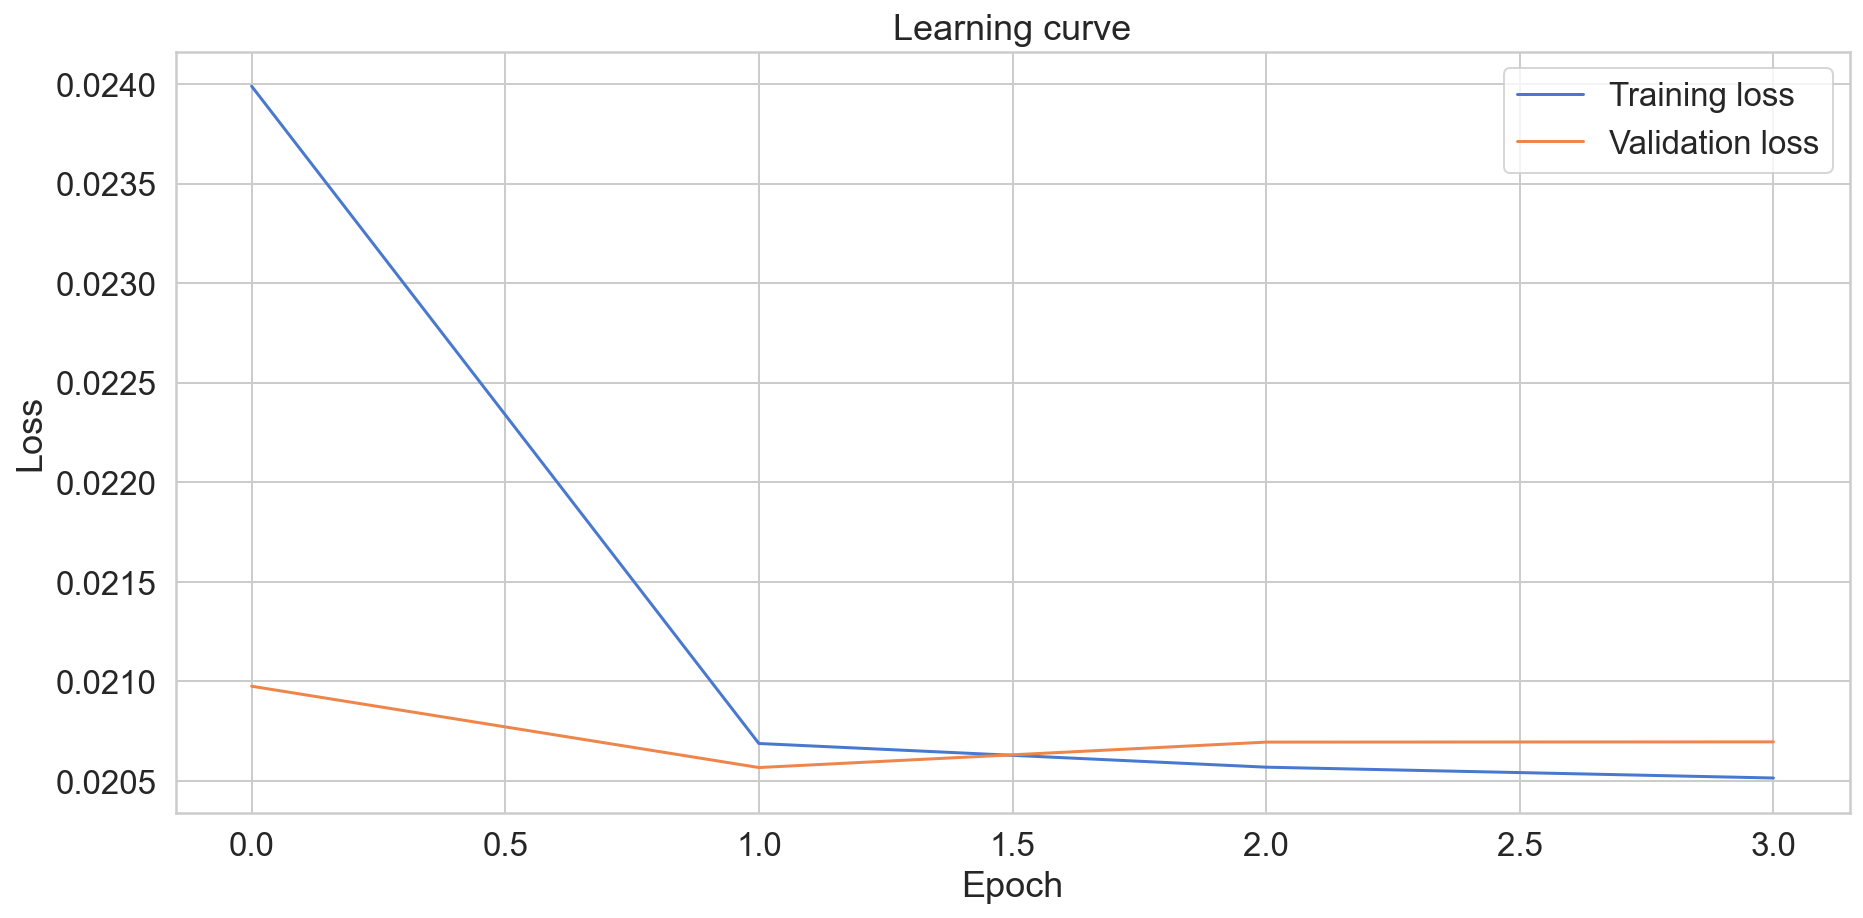

In [33]:
#plot_learn(history_1)

True Negatives:  28530
False Positives:  183
False Negatives:  22
True Positives:  1265
Total predicted purchases:  1287
Model accuracy:  0.874
Model recall:  0.983


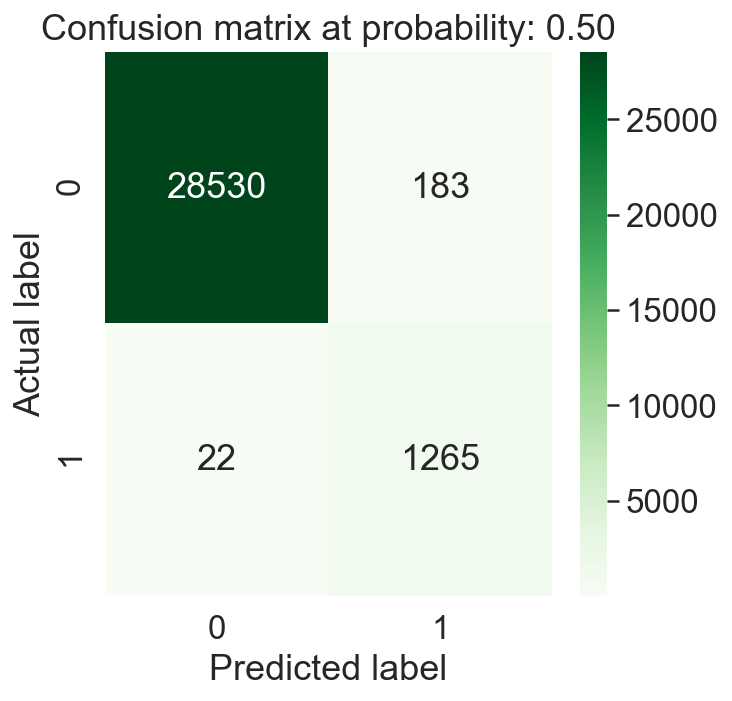

In [42]:
#pred_1 = model_1.predict(X_valid)

#plot_cm(y_valid, pred_1)

In [43]:
model_1.save('saved_models/model_1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_models/model_1\assets
